In [1]:
import csv
import requests

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

CSV_URL = 'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=GOOG&apikey=AHJN4RR4PBBAA3DT&datatype=csv'


,timestamp,open,high,low,close,volume,12MSRA
98,2014-04-30,558.71,604.8300,502.8000,526.66,67171200,NaN
97,2014-05-30,527.11,567.8400,503.3000,559.89,36527700,NaN
96,2014-06-30,560.70,582.4500,538.7500,575.28,37898400,NaN
95,2014-07-31,578.32,599.6500,565.0100,571.60,34516100,NaN
94,2014-08-29,570.40,587.3400,560.0000,571.60,27586000,NaN
...,...,...,...,...,...,...,...
4,2022-02-28,2756.70,3042.0000,2495.2900,2697.82,36609705,2649.619167
3,2022-03-31,2689.60,2883.2500,2517.2150,2792.99,31811236,2709.982500
2,2022-04-29,2800.20,2880.8750,2262.4850,2299.33,28022017,2700.750000
1,2022-05-31,2278.13,2462.8600,2044.1600,2280.78,35869499,2689.851667


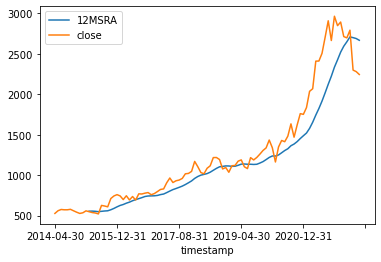

In [2]:
#Obtaining Dataset
dataset = pd.read_csv(CSV_URL)
dataset = dataset.reindex(index = dataset.index[::-1])
#Saving Dataset locally
dataset.to_csv('dataset', index = False)

#12 Months Rolling Average column
dataset['12MSRA'] = dataset['close'].rolling(12).mean()

#Splitting Training and Test set
train = dataset.iloc[:80,:]
test = dataset.iloc[80:,:]
#Saving locally
train.to_csv('train', index = False)
test.to_csv('test', index = False)
dataset.plot(x = 'timestamp', y = ['12MSRA', 'close'])
dataset

In [30]:
#Normalising Closing Values
ss= MinMaxScaler(feature_range=(0,1))
train_close = train.iloc[:,4:5].values
print(train_close)
train_norm= ss.fit_transform(train_close)
train_norm

[[ 526.66]
 [ 559.89]
 [ 575.28]
 [ 571.6 ]
 [ 571.6 ]
 [ 577.36]
 [ 559.08]
 [ 541.83]
 [ 526.4 ]
 [ 534.52]
 [ 558.4 ]
 [ 548.  ]
 [ 537.34]
 [ 532.11]
 [ 520.51]
 [ 625.61]
 [ 618.25]
 [ 608.42]
 [ 710.81]
 [ 742.6 ]
 [ 758.88]
 [ 742.95]
 [ 697.77]
 [ 744.95]
 [ 693.01]
 [ 735.72]
 [ 692.1 ]
 [ 768.79]
 [ 767.05]
 [ 777.29]
 [ 784.54]
 [ 758.04]
 [ 771.82]
 [ 796.79]
 [ 823.21]
 [ 829.56]
 [ 905.96]
 [ 964.86]
 [ 908.73]
 [ 930.5 ]
 [ 939.33]
 [ 959.11]
 [1016.64]
 [1021.41]
 [1046.4 ]
 [1169.94]
 [1104.73]
 [1031.79]
 [1017.33]
 [1084.99]
 [1115.65]
 [1217.26]
 [1218.19]
 [1193.47]
 [1076.77]
 [1094.43]
 [1035.61]
 [1116.37]
 [1119.92]
 [1173.31]
 [1188.48]
 [1103.63]
 [1080.91]
 [1216.68]
 [1188.1 ]
 [1219.  ]
 [1260.11]
 [1304.96]
 [1337.02]
 [1434.23]
 [1339.33]
 [1162.81]
 [1348.66]
 [1428.92]
 [1413.61]
 [1482.96]
 [1634.18]
 [1469.6 ]
 [1621.01]
 [1760.74]]


array([[0.00495876],
       [0.03175217],
       [0.04416116],
       [0.04119397],
       [0.04119397],
       [0.04583827],
       [0.03109907],
       [0.01719036],
       [0.00474912],
       [0.01129629],
       [0.03055078],
       [0.02216524],
       [0.01357006],
       [0.0093531 ],
       [0.        ],
       [0.08474235],
       [0.07880796],
       [0.07088201],
       [0.15343928],
       [0.17907162],
       [0.19219822],
       [0.17935383],
       [0.1429251 ],
       [0.18096643],
       [0.1390871 ],
       [0.17352427],
       [0.13835337],
       [0.20018867],
       [0.19878571],
       [0.20704224],
       [0.21288793],
       [0.19152093],
       [0.20263177],
       [0.22276513],
       [0.24406763],
       [0.24918765],
       [0.31078913],
       [0.35828032],
       [0.31302258],
       [0.33057578],
       [0.33769543],
       [0.35364408],
       [0.40003064],
       [0.4038767 ],
       [0.42402619],
       [0.52363674],
       [0.47105779],
       [0.412

In [31]:
#Constructing Training Numpy Arrays
xtrain = []
ytrain = []
for i in range(30, len(train_norm)):
    xtrain.append(train_norm[i-30:i,0])
    ytrain.append(train_norm[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [32]:
print(xtrain.shape)
xtrain

(50, 30)


array([[0.00495876, 0.03175217, 0.04416116, ..., 0.20018867, 0.19878571,
        0.20704224],
       [0.03175217, 0.04416116, 0.04119397, ..., 0.19878571, 0.20704224,
        0.21288793],
       [0.04416116, 0.04119397, 0.04119397, ..., 0.20704224, 0.21288793,
        0.19152093],
       ...,
       [0.41224612, 0.40058699, 0.45514139, ..., 0.72010837, 0.77602541,
        0.89795441],
       [0.40058699, 0.45514139, 0.47986261, ..., 0.77602541, 0.89795441,
        0.76525322],
       [0.45514139, 0.47986261, 0.56179096, ..., 0.89795441, 0.76525322,
        0.88733541]])

In [33]:
xtrain = np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [34]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [35]:
regression= Sequential()

#First Input layer and LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Dropout(0.2))

# Second LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Third LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Fourth LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))

#Output layer
regression.add(Dense(units=1))

#Compiling the network
regression.compile(optimizer='adam',loss='mean_squared_error')


#fitting
regression.fit(xtrain,ytrain,batch_size=32,epochs=100)

Epoch 1/100
2/2 [==============================] - 5s 37ms/step - loss: 0.2965
Epoch 2/100
2/2 [==============================] - 0s 24ms/step - loss: 0.2081
Epoch 3/100
2/2 [==============================] - 0s 24ms/step - loss: 0.1279
Epoch 4/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0296
Epoch 5/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0532
Epoch 6/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0319
Epoch 7/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0136
Epoch 8/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0173
Epoch 9/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0268
Epoch 10/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0246
Epoch 11/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0154
Epoch 12/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0101
Epoch 13/100
2/2 [==============================]

In [36]:
#Creating Test Numpy array
test_close = test.iloc[:,6:7].values
#Concatinating test and training set to obtain test input with 30 time series values.
total= pd.concat([train['close'],test['close']],axis=0)
print(total[98-19-30:])
test_input = total[len(total)-len(test)-30:].values

test_input = test_input.reshape(-1,1)
print(test_input)

49    1084.99
48    1115.65
47    1217.26
46    1218.19
45    1193.47
44    1076.77
43    1094.43
42    1035.61
41    1116.37
40    1119.92
39    1173.31
38    1188.48
37    1103.63
36    1080.91
35    1216.68
34    1188.10
33    1219.00
32    1260.11
31    1304.96
30    1337.02
29    1434.23
28    1339.33
27    1162.81
26    1348.66
25    1428.92
24    1413.61
23    1482.96
22    1634.18
21    1469.60
20    1621.01
19    1760.74
18    1751.88
17    1835.74
16    2036.86
15    2068.63
14    2410.12
13    2411.56
12    2506.32
11    2704.42
10    2909.24
9     2665.31
8     2965.41
7     2849.04
6     2893.59
5     2713.97
4     2697.82
3     2792.99
2     2299.33
1     2280.78
0     2245.13
Name: close, dtype: float64
[[1115.65]
 [1217.26]
 [1218.19]
 [1193.47]
 [1076.77]
 [1094.43]
 [1035.61]
 [1116.37]
 [1119.92]
 [1173.31]
 [1188.48]
 [1103.63]
 [1080.91]
 [1216.68]
 [1188.1 ]
 [1219.  ]
 [1260.11]
 [1304.96]
 [1337.02]
 [1434.23]
 [1339.33]
 [1162.81]
 [1348.66]
 [1428.92]
 [1413.6

In [37]:

test_input = ss.transform(test_input)
#test_input = np.array(test_input)
print(test_input)


[[0.47986261]
 [0.56179096]
 [0.56254082]
 [0.54260903]
 [0.44851358]
 [0.46275288]
 [0.41532619]
 [0.48044314]
 [0.48330552]
 [0.52635398]
 [0.53858558]
 [0.47017086]
 [0.45185167]
 [0.5613233 ]
 [0.53827919]
 [0.56319392]
 [0.596341  ]
 [0.63250365]
 [0.65835369]
 [0.73673432]
 [0.66021625]
 [0.51788781]
 [0.66773905]
 [0.73245285]
 [0.72010837]
 [0.77602541]
 [0.89795441]
 [0.76525322]
 [0.88733541]
 [1.        ]
 [0.99285616]
 [1.06047265]
 [1.22263612]
 [1.24825234]
 [1.52359643]
 [1.5247575 ]
 [1.60116269]
 [1.76089113]
 [1.92603791]
 [1.72935665]
 [1.9713279 ]
 [1.87749853]
 [1.91341929]
 [1.76859131]
 [1.75556953]
 [1.8323053 ]
 [1.43426622]
 [1.41930932]
 [1.39056465]]


In [38]:
xtest = []
for i in range(30,49):
    xtest.append(test_input[i-30:i,0].tolist())


print(len(xtest[18]))
xtest = np.array(xtest)

30


In [39]:
xtest = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
xtest.shape

(19, 30, 1)

In [40]:
predicted_value = regression.predict(xtest)
predicted_value = ss.inverse_transform(predicted_value)

1/1 [==============================] - 1s 943ms/step


In [41]:
predicted_value

array([[1525.8518],
       [1548.8259],
       [1572.2814],
       [1599.2534],
       [1630.701 ],
       [1669.4749],
       [1712.8123],
       [1762.8225],
       [1816.4584],
       [1875.9159],
       [1939.3167],
       [2007.1268],
       [2080.5361],
       [2156.6682],
       [2230.3687],
       [2304.249 ],
       [2375.8386],
       [2443.4207],
       [2505.9124]], dtype=float32)

In [42]:
test

,timestamp,open,high,low,close,volume,12MSRA
18,2020-12-31,1774.370,1847.2000,1699.0000,1751.88,31422606,1487.327500
17,2021-01-29,1757.540,1934.8600,1699.0000,1835.74,33082794,1520.786667
16,2021-02-26,1853.570,2152.6800,1850.9300,2036.86,29111908,1578.914167
15,2021-03-31,2056.520,2128.8100,2010.0000,2068.63,34796574,1654.399167
14,2021-04-30,2097.950,2452.3780,2096.8900,2410.12,30727072,1742.854167
13,2021-05-28,2402.720,2442.9440,2230.0500,2411.56,25456404,1824.740833
12,2021-06-30,2422.000,2555.9200,2382.8300,2506.32,27425377,1915.800000
11,2021-07-30,2496.995,2800.2200,2496.9950,2704.42,22824857,2017.588333
10,2021-08-31,2709.690,2929.7899,2683.6700,2909.24,18615809,2123.843333
9,2021-09-30,2913.000,2936.4099,2660.0000,2665.31,25265626,2223.485833


In [65]:
testplot = np.array(test['close'
])

In [66]:
predicted_value

array([[1525.8518],
       [1548.8259],
       [1572.2814],
       [1599.2534],
       [1630.701 ],
       [1669.4749],
       [1712.8123],
       [1762.8225],
       [1816.4584],
       [1875.9159],
       [1939.3167],
       [2007.1268],
       [2080.5361],
       [2156.6682],
       [2230.3687],
       [2304.249 ],
       [2375.8386],
       [2443.4207],
       [2505.9124]], dtype=float32)

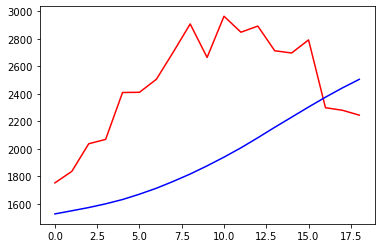

In [68]:
plt.plot(testplot, 'red')
plt.plot(predicted_value,'blue')
plt.show()